## Machine Learning test

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

## IMPORTING THE CLEANED DATAFRAME
df_final = pd.read_csv('./CSV/df_merged_clean.csv')
#Print to ensure it is the right data frame

df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final['log_vol'] = np.log(df_final['volume'])
df_final

,Date,mean,std,volume,daily_return,log_vol
0,2005-01-03,-0.500000,0.707107,2,-0.018395,0.693147
1,2005-01-06,0.000000,0.000000,3,0.027972,1.098612
2,2005-01-07,0.000000,0.000000,4,0.015306,1.386294
3,2005-01-11,-0.333333,0.577350,3,-0.018487,1.098612
4,2005-01-18,-1.000000,1.414214,2,-0.011986,0.693147
...,...,...,...,...,...,...
1701,2023-08-07,0.000000,0.000000,3,0.028071,1.098612
1702,2023-08-08,0.250000,2.179449,12,0.172622,2.484907
1703,2023-08-09,1.444444,2.962731,9,-0.012815,2.197225
1704,2023-08-10,-0.400000,1.776388,10,-0.012189,2.302585


In [60]:
#Descriptive statistics
print(df_final[['mean', 'std', 'volume']].describe(percentiles=[]).loc[['mean', 'std', 'min','50%', 'max']].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      mean &       std &     volume \\
\midrule
mean &  0.126970 &  0.942078 &   4.163540 \\
std  &  0.915885 &  0.868317 &   3.523809 \\
min  & -5.000000 &  0.000000 &   2.000000 \\
50\%  &  0.000000 &  0.957427 &   3.000000 \\
max  &  4.000000 &  5.656854 &  38.000000 \\
\bottomrule
\end{tabular}



/var/folders/nh/25gr2gcn4rd1mz34g3j0_b8m0000gn/T/ipykernel_51029/2080026211.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_final[['mean', 'std', 'volume']].describe(percentiles=[]).loc[['mean', 'std', 'min','50%', 'max']].to_latex())


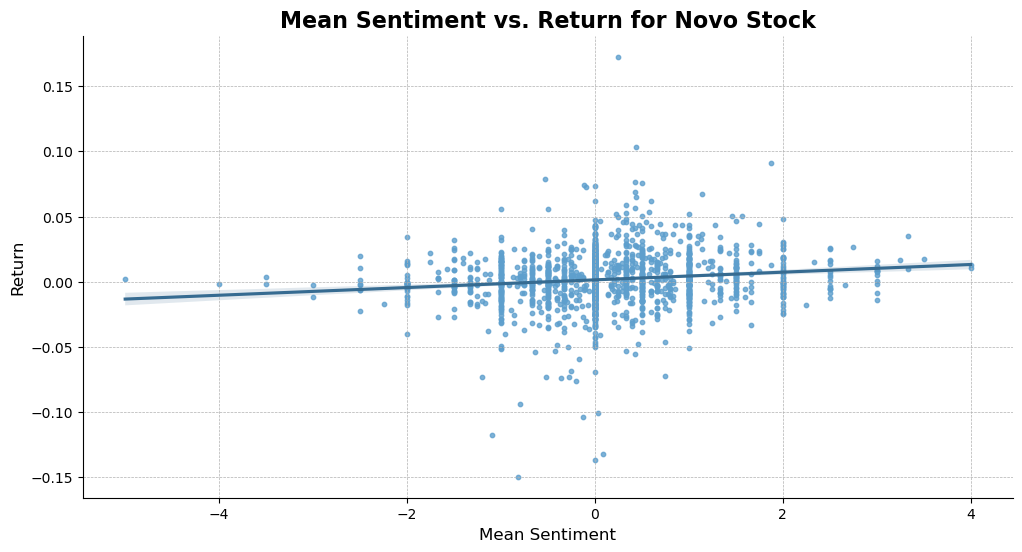

In [63]:
# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='mean', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Mean Sentiment vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('Mean Sentiment', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.show()

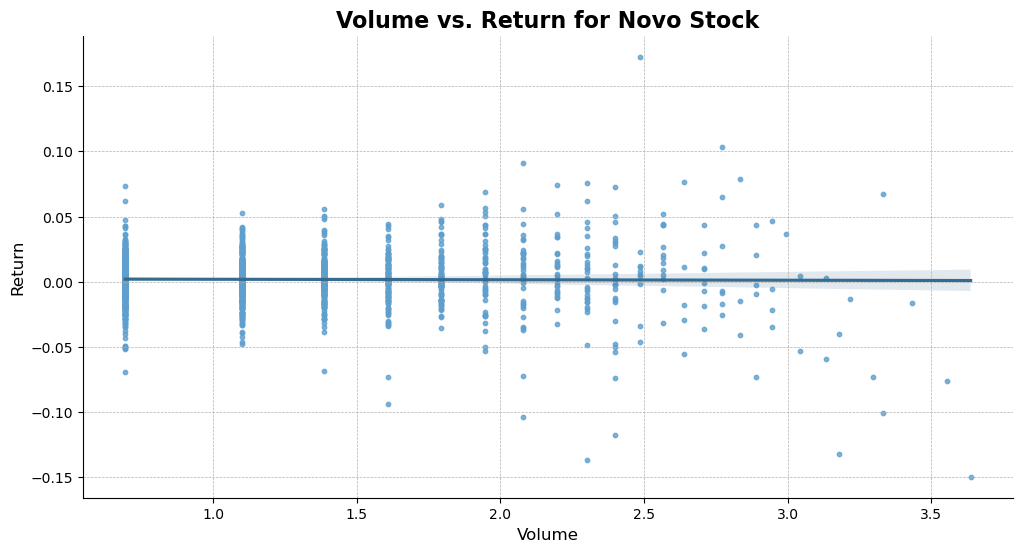

In [82]:

# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='log_vol', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Volume vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('Volume', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.show()

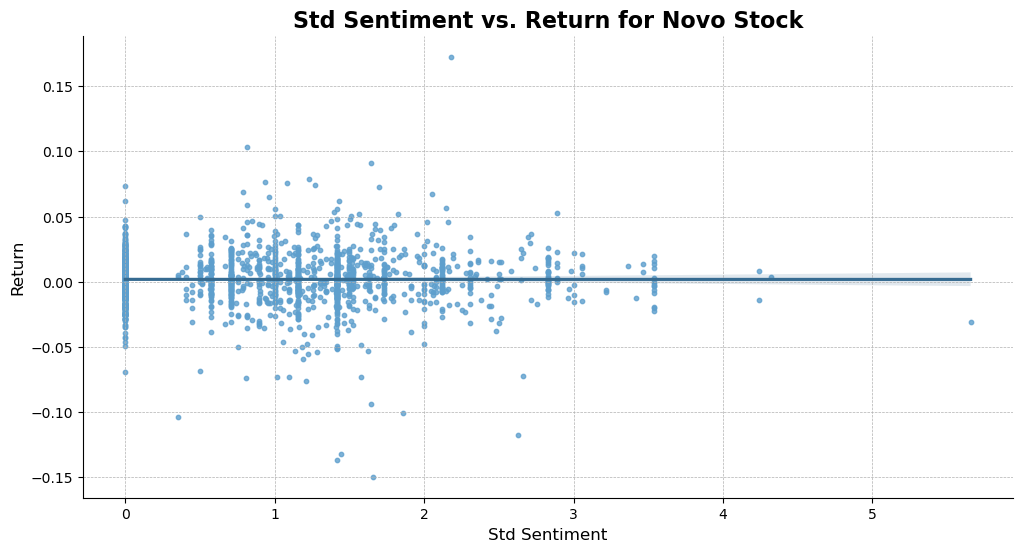

In [65]:
# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='std', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Std Sentiment vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('Std Sentiment', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.show()

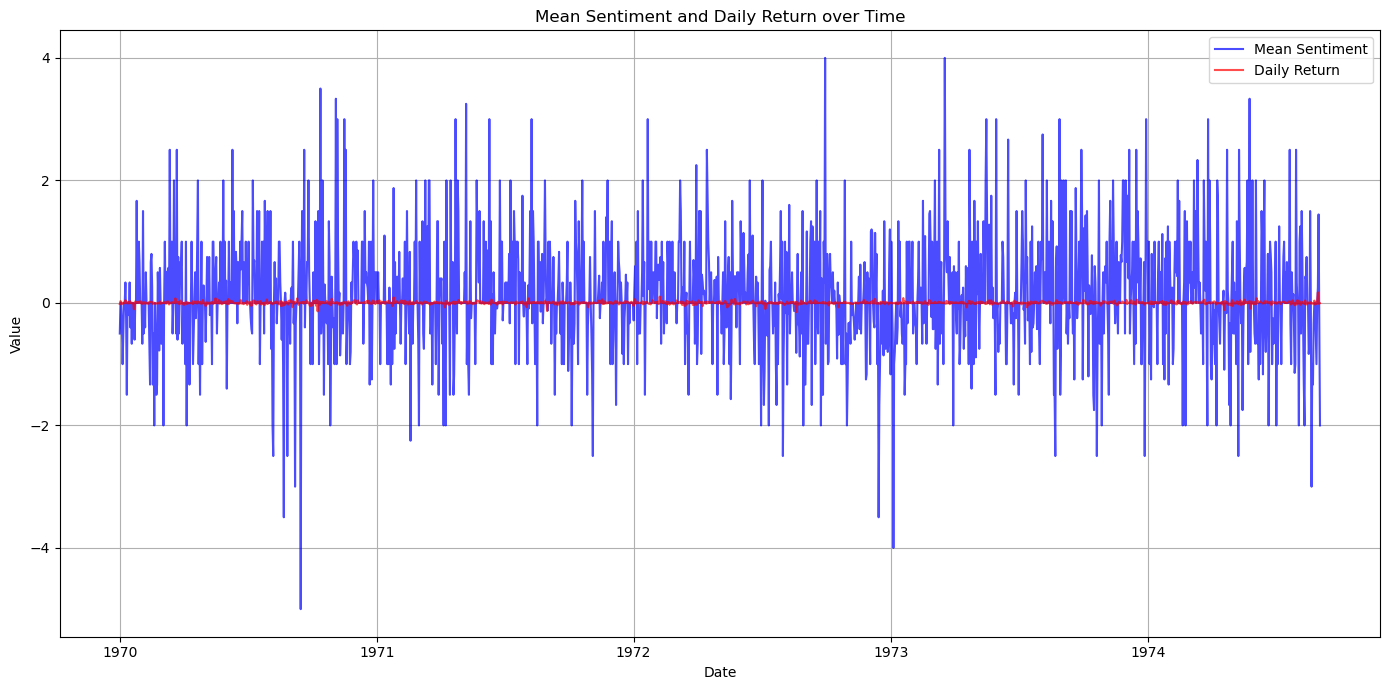

In [52]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))

# Plot Mean Sentiment
plt.plot(df_final['Date'], df_final['mean'], label='Mean Sentiment', color='blue', alpha=0.7)
# Plot Daily Return
plt.plot(df_final['Date'], df_final['daily_return'], label='Daily Return', color='red', alpha=0.7)

plt.title('Mean Sentiment and Daily Return over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Set the x-axis to only show the year
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to be spaced one year apart
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks to show only the year

plt.tight_layout()
plt.show()

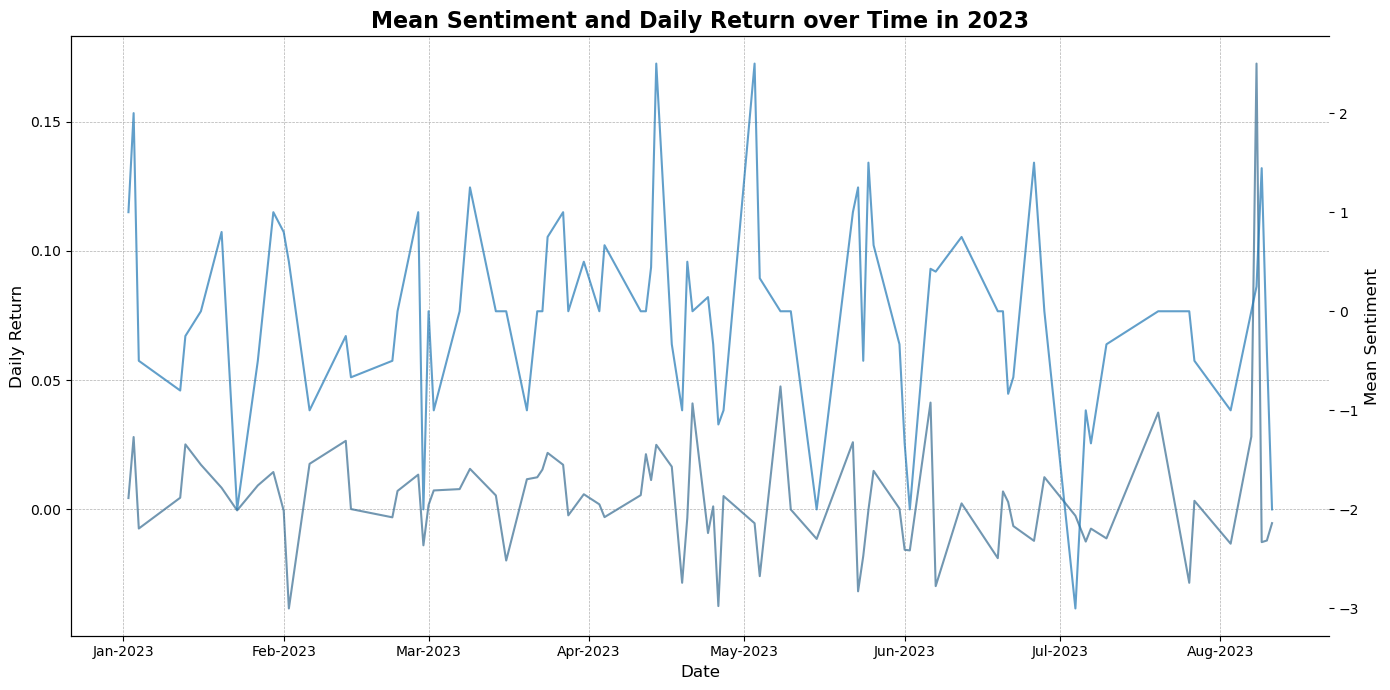

In [76]:
import matplotlib.dates as mdates

# Filter the dataframe for the year 2023
df_2023 = df_final[df_final['Date'].dt.year == 2023]

# Set up the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Daily Return on primary y-axis
ax1.plot(df_2023['Date'], df_2023['daily_return'], label='Daily Return', color=blue_palette[1], alpha=0.7)
ax1.set_xlabel('Date', fontsize=12, fontname='DejaVu Sans')
ax1.set_ylabel('Daily Return', fontsize=12, fontname='DejaVu Sans')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set up secondary y-axis for Mean Sentiment and use a darker blue
ax2 = ax1.twinx()
ax2.plot(df_2023['Date'], df_2023['mean'], label='Mean Sentiment', alpha=0.7)
ax2.set_ylabel('Mean Sentiment', fontsize=12, fontname='DejaVu Sans')

# Title and legend
plt.title('Mean Sentiment and Daily Return over Time in 2023', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
fig.tight_layout()

# Remove right spine
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.show()


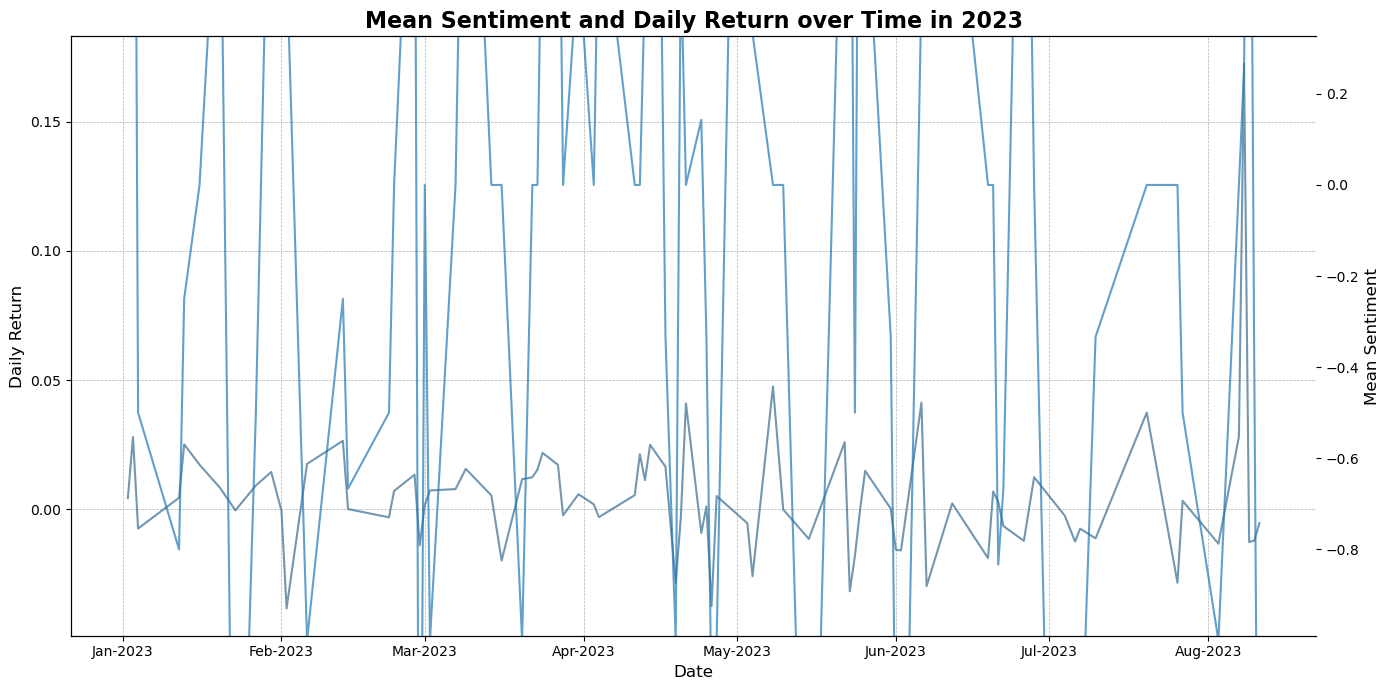

In [80]:
# Get the current y-axis limits for the primary and secondary axes
y1_lim = ax1.get_ylim()
y2_lim = ax2.get_ylim()

# Calculate where zero would be on both axes in terms of a fraction of the axis limits
y1_fraction = abs(y1_lim[0] / (y1_lim[1] - y1_lim[0]))
y2_fraction = abs(y2_lim[0] / (y2_lim[1] - y2_lim[0]))

# Adjust the secondary y-axis limits to align the zeros
y2_new_min = y2_lim[0] - (y2_lim[1] - y2_lim[0]) * y2_fraction / y1_fraction
y2_new_max = y2_lim[1] + (y2_lim[1] - y2_lim[0]) * (1 - y2_fraction) / (1 - y1_fraction)

# Re-plot the graph with the new y-axis limits for the secondary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Daily Return on primary y-axis
ax1.plot(df_2023['Date'], df_2023['daily_return'], label='Daily Return', color=blue_palette[1], alpha=0.7)
ax1.set_xlabel('Date', fontsize=12, fontname='DejaVu Sans')
ax1.set_ylabel('Daily Return', fontsize=12, fontname='DejaVu Sans')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set up secondary y-axis for Mean Sentiment and adjust its limits
ax2 = ax1.twinx()
ax2.plot(df_2023['Date'], df_2023['mean'], label='Mean Sentiment', alpha=0.7)
ax2.set_ylim(y2_new_min, y2_new_max)
ax2.set_ylabel('Mean Sentiment', fontsize=12, fontname='DejaVu Sans')

# Title and legend
plt.title('Mean Sentiment and Daily Return over Time in 2023', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
fig.tight_layout()

# Format x-axis to show date as "mmm-YYYY"
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Remove right spine
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()



In [3]:
# Splitting the data into features and target variable
X = df_final[['mean', 'std', 'volume']]  # Features
y = df_final['daily_return']  # Target variable

In [4]:
# SPLIT INTO DEVELOPMENT (2/3) AND TEST DATA (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=161193)

# SPLIT DEVELOPMENT INTO TRAIN (1/3) AND VALIDATION (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=161193)

In [56]:
#Linear regression 
# DEFINE PIPELINE
pipe_lr = make_pipeline(PolynomialFeatures(), 
                        StandardScaler(),
                        LinearRegression())

# FIT PIPELINE TO DEVELOPMENT DATA
pipe_lr.fit(X_dev, y_dev)

# After fitting the pipeline
coefficients = pipe_lr.named_steps['linearregression'].coef_
intercept = pipe_lr.named_steps['linearregression'].intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 0.001402012845198209
Coefficients: [ 0.         -0.00166481  0.00016602  0.00840397  0.0004522  -0.00079733
  0.00604219  0.0001705  -0.00207786 -0.0104766 ]


In [57]:
import statsmodels.api as sm

# Assuming you have already transformed the data using the first two steps of your pipeline
X_transformed = pipe_lr.named_steps['polynomialfeatures'].transform(X_dev)
X_transformed = pipe_lr.named_steps['standardscaler'].transform(X_transformed)

# Add constant to the features (for intercept)
X_transformed = sm.add_constant(X_transformed)

model = sm.OLS(y_dev, X_transformed)
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           daily_return   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     18.76
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.10e-29
Time:                        09:22:59   Log-Likelihood:                 2811.8
No. Observations:                1137   AIC:                            -5604.
Df Residuals:                    1127   BIC:                            -5553.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.306      0.0

In [41]:
##Lasso regression
##Construct a model building pipeline which adds polynomial features of degree 3 without bias; scales the features to mean zero and unit std.; estimates a Lasso model
# PREPARATION
perform = [] # Store performance
lambdas = np.logspace(-4, 4, 66) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=161193))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_pred, y_val))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.8f' % optimal.values[0])

Optimal lambda: 0.0004124626382901352
Validation MSE: 0.00069651
Lasso Coefficients: [ 0.  0. -0. -0.  0.  0.  0. -0. -0. -0.]


In [45]:
#Lasso and linear results

# INSERT OPTIMAL LAMBDA INTO NEW MODEL
pipe_lasso = make_pipeline(PolynomialFeatures(), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

# FIT NEW MODEL ON ALL OF THE DEVELOPMENT (non-test) DATA TO BUILD BEST POSSIBLE MODEL
pipe_lasso.fit(X_dev, y_dev) 

# COMPARE MODEL PERFORMANCE ON TEST DATA
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 8))
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 8))

print(pipe_lasso.named_steps['lasso'].coef_)
print("Number of Lasso coefficients:", len(lasso_coef))
print("Non-zero Lasso coefficients:", np.sum(lasso_coef != 0))

Lasso 0.00031938
LinReg 0.00032274
[ 0.         -0.00060308 -0.          0.00299963 -0.         -0.00052832
  0.00498273 -0.         -0.         -0.00690831]
Number of Lasso coefficients: 10
Non-zero Lasso coefficients: 0


In [24]:
#Set up CV lasso

from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
folds = list(kfolds.split(X_dev, y_dev))

# Outer loop: lambdas
mseCV = []
for lambda_ in lambdas:    
    
    # Inner loop: folds
    mseCV_ = []    
    for train_idx, val_idx in folds:        
        
        # Train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=2, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=161193))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
        
    # Store result    
    mseCV.append(mseCV_) 
    
# Convert to DataFrame
lambdaCV = pd.DataFrame(mseCV, index=lambdas)

In [26]:
# CHOOSE OPTIMAL HYPERPARAMETERS (mean of MSE's across folds)
optimal_lambda = lambdaCV.mean(axis=1).nsmallest(1)

# RETRAIN/RE-ESTIMATE MODEL USING OPTIMAL HYPERPARAMETERS AND COMPARE PERFORMANCE
pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda.index[0], random_state=161193))

pipe_lassoCV.fit(X_dev,y_dev) #fit optimal lambda to entire development set: likely to improve performance slightly since we use more oberservations

#Now prinst all results 
models = {'Lasso': pipe_lasso, 'Lasso CV': pipe_lassoCV, 'LinReg': pipe_lr}
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 8))

Lasso 0.00031938
Lasso CV 0.00031959
LinReg 0.00032274


       train      test        lambda
0   0.000411  0.000430      0.000100
1   0.000420  0.000434      0.000534
2   0.000435  0.000448      0.002848
3   0.000479  0.000480      0.015199
4   0.000479  0.000480      0.081113
5   0.000479  0.000480      0.432876
6   0.000479  0.000480      2.310130
7   0.000479  0.000480     12.328467
8   0.000479  0.000480     65.793322
9   0.000479  0.000480    351.119173
10  0.000479  0.000480   1873.817423
11  0.000479  0.000480  10000.000000


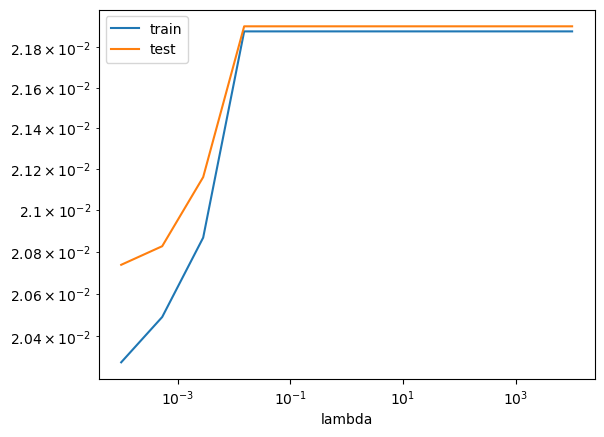

In [14]:
lambdas =  np.logspace(-4, 4, 12)

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_dev,
                     y=y_dev,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',# scoring='neg_mean_squared_error',                 
                     cv=10)

mean_values = pd.concat({'train': pd.DataFrame(-train_scores).mean(1), 
                         'test': pd.DataFrame(-test_scores).mean(1), 
                         'lambda': pd.DataFrame(lambdas).mean(1)}, axis =1)

print(mean_values)

# Plotting
def rmse(y_pred, y_true):
    return np.sqrt(mse(y_pred, y_true))


# plot curves
pd.concat({'train': pd.DataFrame(-train_scores).mean(1), 
           'test': pd.DataFrame(-test_scores).mean(1)},
           axis=1)\
    .pipe(np.sqrt)\
    .set_index(pd.Index(lambdas, name='lambda'))\
    .plot(logx=True, logy=True)

plt.show()

### END SOLUTION


In [15]:
from sklearn.model_selection import validation_curve

# FIT AND EVALUATE FOR DIFFERENT LAMBDAS
train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_dev,
                     y=y_dev,
                     param_name='lasso__alpha', #built-in name of hyperparameter
                     param_range=lambdas, #values to consider
                     scoring='neg_mean_squared_error',                 
                     cv=10)

# OBTAIN MSE FOR DIFFERENT LAMBDAS AND PRINT BEST
mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Validation.nsmallest(1))

lambda
0.0001    0.00043
Name: Validation, dtype: float64
